## The WordCloud function

The WordCloud function from wordcloud allows creating word clouds in Python. The function provides several methods, but generate is the one you need to create a word cloud from a text string. Note that by default, the image size is 400x200 but you can customize the size with width and height, as in the example below or using scale (defaults to 1), which is recommended for large word clouds.

It is worth to mention that if you want words to be repeated set repeat = True. This is very useful for creating a word cloud from a single word or small texts.

In [3]:
# %pip install wordcloud

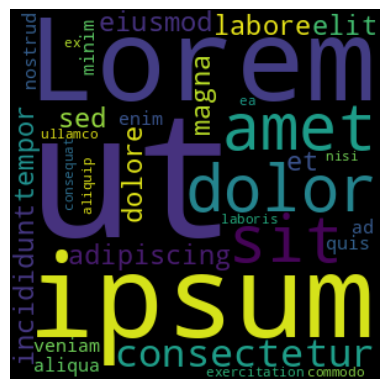

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat"

wc = WordCloud(width = 300, height = 300).generate(text)

# Remove the axis and display the data as image
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

plt.show() 


Background color

The background_color argument can be used to override the default black color of the word cloud image.

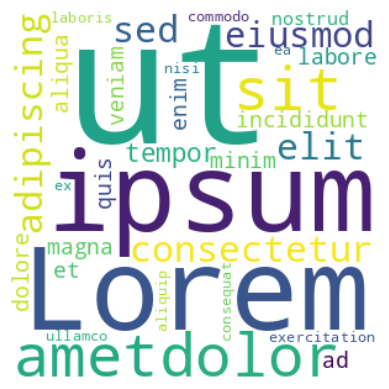

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat"

wc = WordCloud(width = 300, height = 300, background_color = "white")
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

# plt.show() 


Color map

By using colormap you can customize the color palette used to draw the colors for each word. These colors are randomly selected from the color map.

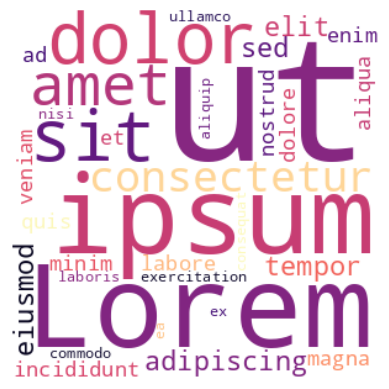

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat"

wc = WordCloud(width = 300, height = 300, background_color = "white",
               colormap = "magma")
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

# plt.show() 


Font size

The WordCloud function provides the min_font_size (default: 4) and max_font_size (default: None) arguments which are the smallest and largest font size to use within the word cloud.

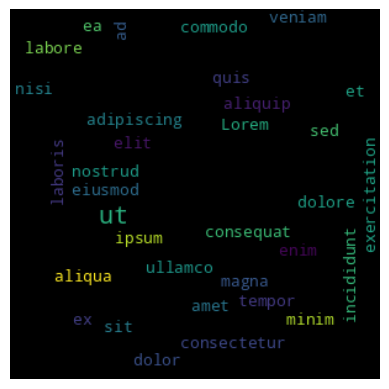

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat"

wc = WordCloud(width = 300, height = 300,
               max_font_size = 20, min_font_size = 10)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

# plt.show() 


Maximum number of words

By default, the word cloud will try to fit up to 200 words, but you can decrease the number of words with max_words. In the following example we are setting the maximum number of words to five.

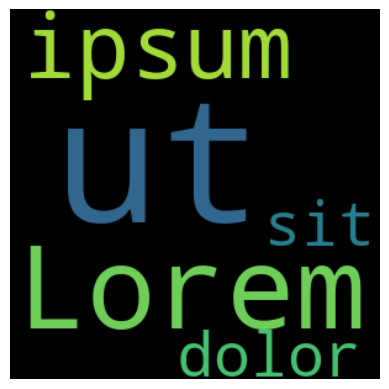

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat"

wc = WordCloud(width = 300, height = 300,
               max_words = 5)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

# plt.show() 


Stopwords

Stop words are the words that will be eliminated from the word cloud image. By default the function takes into account a predefined list of stop words, but you can set your own with stopwords.

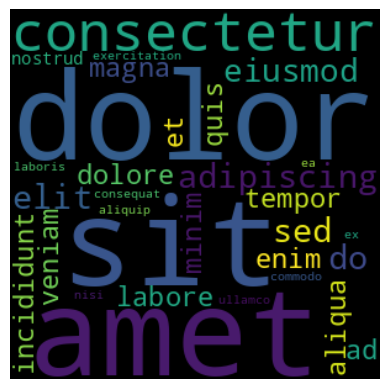

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat"

wc = WordCloud(width = 300, height = 300,
               stopwords = ["Lorem", "ipsum", "ut"])
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

# plt.show() 
